# Data Exploring

In [118]:
import pandas as pd
import numpy as np 

In [119]:
df = pd.read_csv("Customer_Churn.csv")

In [120]:
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Check for duplication

In [122]:
df[df.duplicated()]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

In [123]:
df.describe(include=['object']).T

count unique               top  freq
customerID        7043   7043        7590-VHVEG     1
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
TotalCharges      7043   6531                      11
Churn             7043      2                No  5174

## Check missing values 

In [124]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [125]:
def check_hidden_missing_objects(df, columns=None, verbose=True):
    if columns is None:
        columns = list(set(df.columns) - set(df._get_numeric_data().columns))

    missing_counts = {}
    
    for col in columns:
        count = df[col].apply(
            lambda x: isinstance(x, str) and (x.strip().lower() in ['', 'nan'])
        ).sum()
        missing_counts[col] = count
        if verbose:
            print(f"{col.ljust(25)} : {count} hidden missing values")
    
    return pd.Series(missing_counts).sort_values(ascending=False)


In [126]:
check_hidden_missing_objects(df)

gender                    : 0 hidden missing values
Churn                     : 0 hidden missing values
OnlineSecurity            : 0 hidden missing values
TotalCharges              : 11 hidden missing values
TechSupport               : 0 hidden missing values
PaperlessBilling          : 0 hidden missing values
InternetService           : 0 hidden missing values
customerID                : 0 hidden missing values
PhoneService              : 0 hidden missing values
StreamingTV               : 0 hidden missing values
Dependents                : 0 hidden missing values
PaymentMethod             : 0 hidden missing values
MultipleLines             : 0 hidden missing values
StreamingMovies           : 0 hidden missing values
DeviceProtection          : 0 hidden missing values
Contract                  : 0 hidden missing values
Partner                   : 0 hidden missing values
OnlineBackup              : 0 hidden missing values


TotalCharges        11
gender               0
Dependents           0
Partner              0
Contract             0
DeviceProtection     0
StreamingMovies      0
MultipleLines        0
PaymentMethod        0
StreamingTV          0
Churn                0
PhoneService         0
customerID           0
InternetService      0
PaperlessBilling     0
TechSupport          0
OnlineSecurity       0
OnlineBackup         0
dtype: int64

## Handle missing values

### Convert TotalCharges to numeric 

In [127]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

In [128]:
indices_null_tc = df[df["TotalCharges"].isna()].index

In [129]:
display(df.iloc[indices_null_tc])

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [130]:
display(df[df.tenure == 1].head(10))

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0    7590-VHVEG  Female              0     Yes         No       1   
20   8779-QRDMV    Male              1      No         No       1   
22   1066-JKSGK    Male              0      No         No       1   
27   8665-UTDHZ    Male              0     Yes        Yes       1   
33   7310-EGVHZ    Male              0      No         No       1   
34   3413-BMNZE    Male              1      No         No       1   
70   2273-QCKXA    Male              0      No         No       1   
80   5919-TMRGD  Female              0      No        Yes       1   
91   2424-WVHPL    Male              1      No         No       1   
100  6380-ARCEH    Male              0      No         No       1   

    PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0             No  No phone service             DSL                   No  ...   
20            No  No phone service             DSL                   No  ...   
22           Yes                No              No  No internet service  ...   
27            No  No phone service             DSL                   No  ...   
33           Yes                No              No  No internet service  ...   
34           Yes                No             DSL                   No  ...   
70           Yes                No             DSL                   No  ...   
80           Yes                No     Fiber optic                   No  ...   
91           Yes                No     Fiber optic                   No  ...   
100          Yes                No              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
0                     No                   No                   No   
20                   Yes                   No                   No   
22   No internet service  No internet service  No internet service   
27                    No                   No                   No   
33   No internet service  No internet service  No internet service   
34                    No                   No                   No   
70                    No                  Yes                   No   
80                    No                   No                  Yes   
91                    No                  Yes                   No   
100  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling  \
0                     No  Month-to-month              Yes   
20                   Yes  Month-to-month              Yes   
22   No internet service  Month-to-month               No   
27                    No  Month-to-month               No   
33   No internet service  Month-to-month               No   
34                    No  Month-to-month               No   
70                    No  Month-to-month               No   
80                    No  Month-to-month              Yes   
91                    No  Month-to-month               No   
100  No internet service  Month-to-month               No   

                 PaymentMethod MonthlyCharges  TotalCharges  Churn  
0             Electronic check          29.85         29.85     No  
20            Electronic check          39.65         39.65    Yes  
22                Mailed check          20.15         20.15    Yes  
27            Electronic check          30.20         30.20    Yes  
33   Bank transfer (automatic)          20.20         20.20     No  
34   Bank transfer (automatic)          45.25         45.25     No  
70                Mailed check          49.05         49.05     No  
80            Electronic check          79.35         79.35    Yes  
91            Electronic check          74.70         74.70     No  
100               Mailed check          20.20         20.20     No  

[10 rows x 21 columns]

In [131]:
display(df[df.tenure == 5].head(10))

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
36   6047-YHPVI    Male              0      No         No       5   
97   0278-YXOOG    Male              0      No         No       5   
105  6180-YBIQI    Male              0      No         No       5   
275  6432-TWQLB    Male              0     Yes         No       5   
279  4130-MZLCC  Female              0      No         No       5   
313  2799-ARNLO  Female              1     Yes         No       5   
314  7563-BIUPC    Male              0      No         No       5   
360  9294-TDIPC    Male              0      No        Yes       5   
365  1010-DIAUQ    Male              0      No         No       5   
420  2233-FAGXV  Female              0     Yes        Yes       5   

    PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
36           Yes                No     Fiber optic                   No  ...   
97           Yes                No              No  No internet service  ...   
105           No  No phone service             DSL                   No  ...   
275          Yes               Yes     Fiber optic                   No  ...   
279          Yes                No             DSL                   No  ...   
313          Yes                No     Fiber optic                   No  ...   
314          Yes                No     Fiber optic                   No  ...   
360          Yes                No              No  No internet service  ...   
365          Yes                No     Fiber optic                   No  ...   
420          Yes               Yes              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
36                    No                   No                   No   
97   No internet service  No internet service  No internet service   
105                   No                   No                   No   
275                   No                  Yes                   No   
279                   No                   No                   No   
313                   No                   No                   No   
314                   No                   No                  Yes   
360  No internet service  No internet service  No internet service   
365                  Yes                   No                  Yes   
420  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling  \
36                    No  Month-to-month              Yes   
97   No internet service  Month-to-month               No   
105                   No  Month-to-month               No   
275                   No  Month-to-month              Yes   
279                   No  Month-to-month               No   
313                   No  Month-to-month              Yes   
314                   No  Month-to-month              Yes   
360  No internet service  Month-to-month               No   
365                  Yes  Month-to-month               No   
420  No internet service  Month-to-month              Yes   

                 PaymentMethod MonthlyCharges  TotalCharges  Churn  
36            Electronic check          69.70        316.90    Yes  
97                Mailed check          21.05        113.85    Yes  
105               Mailed check          24.30        100.20     No  
275           Electronic check          85.40        401.10    Yes  
279  Bank transfer (automatic)          50.55        244.75     No  
313           Electronic check          69.35        341.60     No  
314           Electronic check          80.60        415.55    Yes  
360               Mailed check          20.20         83.75     No  
365  Bank transfer (automatic)          96.50        492.55    Yes  
420               Mailed check          24.30        132.25     No  

[10 rows x 21 columns]

### Clearly see that TotalCharge depends on Tenure and MonthlyCharges
### Conclusion: 'TotalCharges' = 'MonthlyCharges' x 'Tenure' + Extra Cost
### Therefore, imputing missing values on 'TotalCharges' column with 0

In [132]:
df.fillna({'TotalCharges': 0}, inplace=True)

In [133]:
df.to_csv('cleaned_data.csv', index=False)

In [134]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T

count         mean          std    min     25%      50%  \
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.00   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.35   
TotalCharges    7043.0  2279.734304  2266.794470   0.00  398.55  1394.55   

                    75%      max  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80

In [135]:
df.dtypes.value_counts()

object     17
int64       2
float64     2
Name: count, dtype: int64

In [136]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [137]:
df.describe().round()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
count         7043.0  7043.0          7043.0        7043.0
mean             0.0    32.0            65.0        2280.0
std              0.0    25.0            30.0        2267.0
min              0.0     0.0            18.0           0.0
25%              0.0     9.0            36.0         399.0
50%              0.0    29.0            70.0        1395.0
75%              0.0    55.0            90.0        3787.0
max              1.0    72.0           119.0        8685.0

### Half of the clients remain in the company for more than 29 months (just over two years);
### The average amount per month $ 65;
### The average total revenue generated per customer is 2280.

Text(0.5, 1.0, 'Relationship between loyalty months and total revenue')

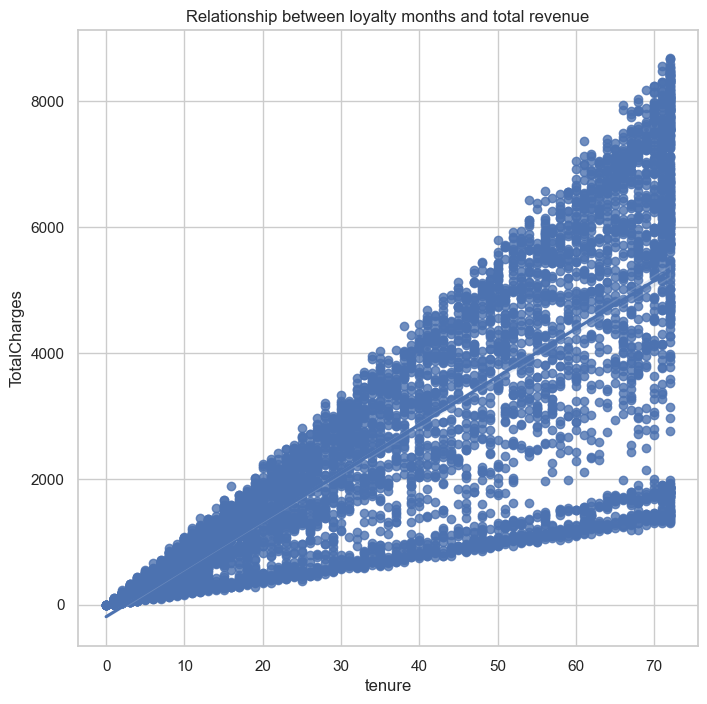

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
numerics = df[['tenure','MonthlyCharges', 'TotalCharges', 'Churn']]

plt.figure(figsize = (8,8))

sns.regplot(x = 'tenure', y = 'TotalCharges', data = numerics)

plt.title('Relationship between loyalty months and total revenue')

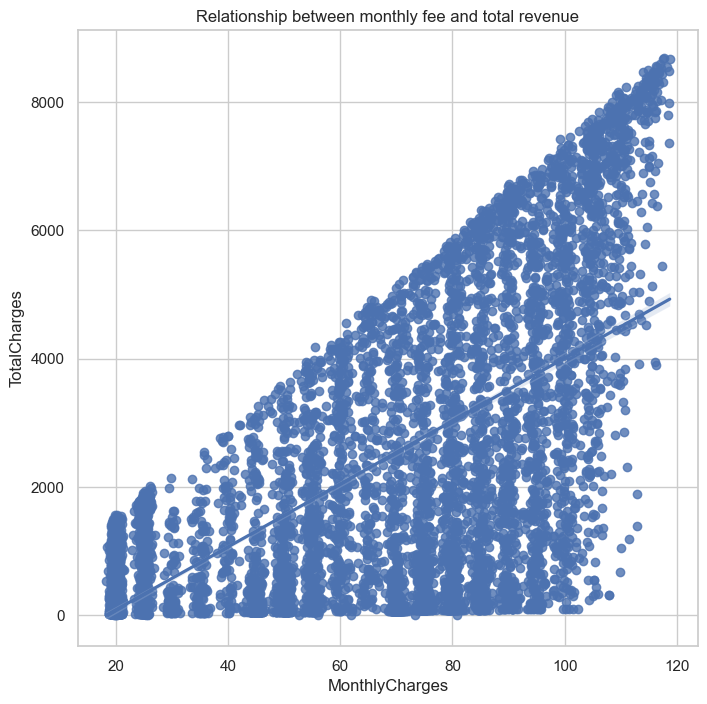

In [139]:
plt.figure(figsize = (8,8))
plt.title('Relationship between monthly fee and total revenue')
ax = sns.regplot(x = 'MonthlyCharges', y = 'TotalCharges', data = numerics)

<Figure size 1500x1000 with 0 Axes>

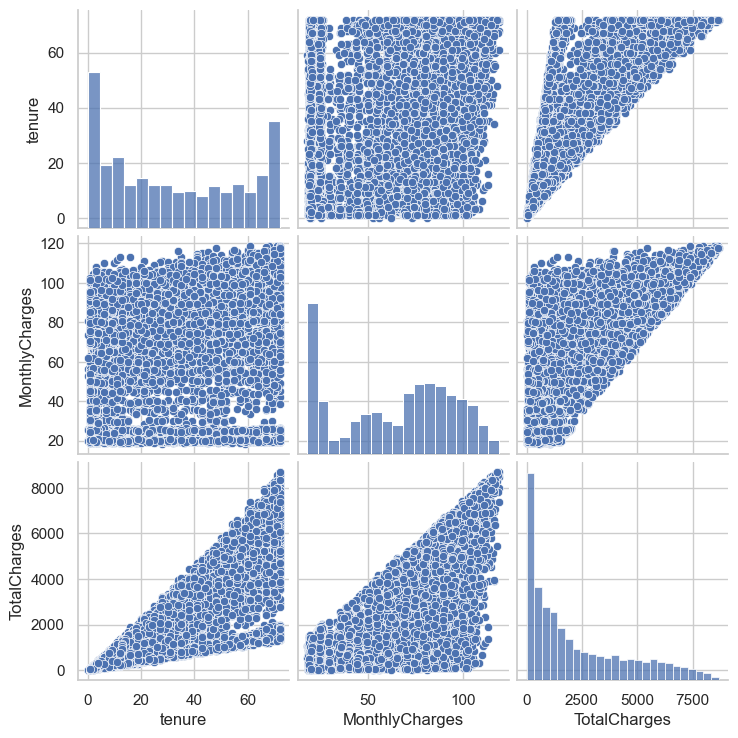

In [140]:
plt.figure(figsize = (15,10))
sns.pairplot(numerics)

Text(0.5, 1.0, 'Box Plot of Total Payments X Months of Loyalty')

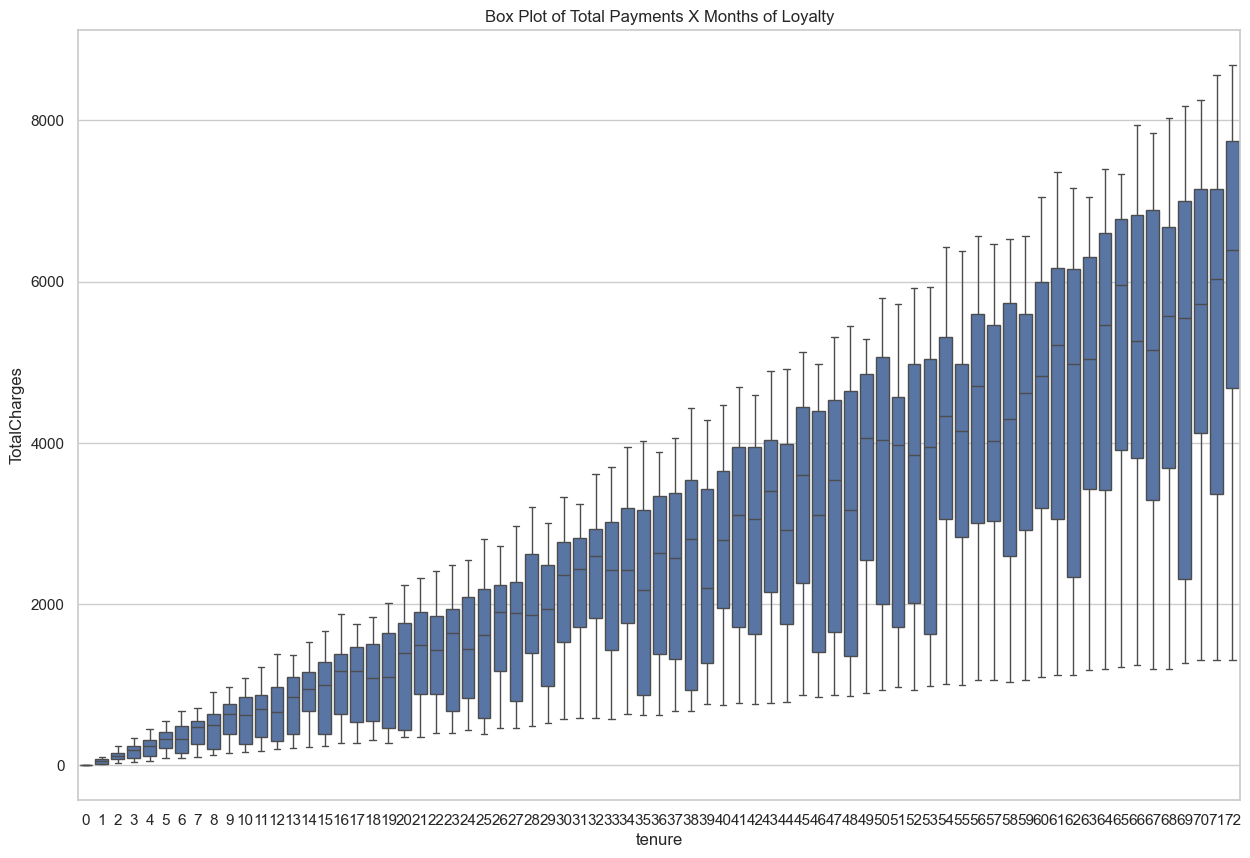

In [141]:
plt.figure(figsize = (15,10))

sns.boxplot(x = 'tenure', y = 'TotalCharges', data = df)

plt.title('Box Plot of Total Payments X Months of Loyalty')

## We have analyzed the relationship between customer tenure and total spending, which shows a clear linear pattern—naturally, the longer a customer stays, the more they spend overall.

## Similarly, there is a linear correlation between monthly charges and total revenue, indicating that customers with higher monthly fees contribute more to the company’s earnings.

## However, there's no apparent relationship between how long a customer has been with the house and how much they pay per month. This suggests that many customers stick with the same services over time, while others may start out with more expensive plans from the beginning.

## Additionally, based on the boxplot analysis, the dataset appears to be free of significant outliers.

In [142]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [143]:
df.describe(include ='object')

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod Churn  
count              7043              7043  7043  
unique                2                 4     2  
top                 Yes  Electronic check    No  
freq               4171              2365  5174

### Most customers are not Senior;
### Most customers are Male;
### The most popular internet service is fiber optics;
### Most customers prefer not to receive printed accounts;
### The most popular form of payment is the electronic payment

In [144]:
pd.crosstab(df.Churn, df.SeniorCitizen,
            margins = True)

SeniorCitizen     0     1   All
Churn                          
No             4508   666  5174
Yes            1393   476  1869
All            5901  1142  7043

<Axes: xlabel='SeniorCitizen', ylabel='count'>

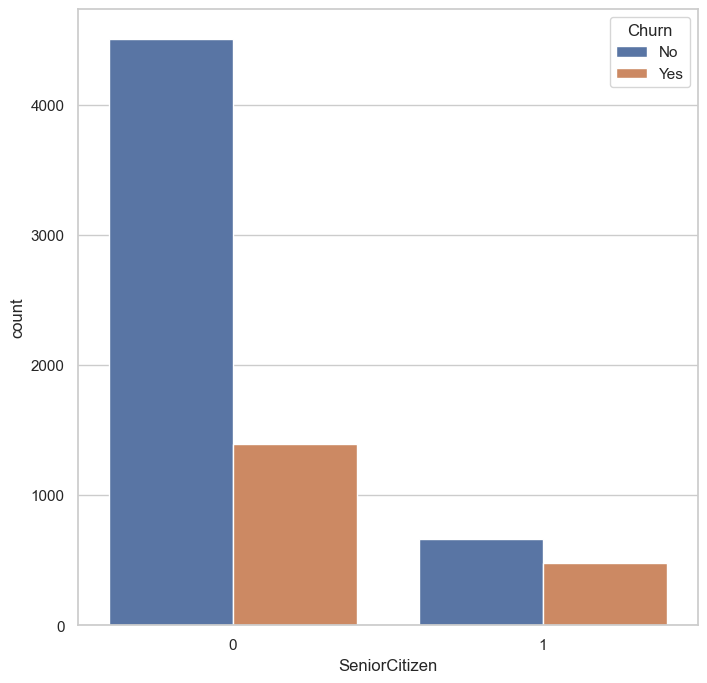

In [145]:
plt.figure(figsize=(8, 8))
sns.set(style='whitegrid')

sns.countplot(data=df, x='SeniorCitizen', hue='Churn')

### The volume of older people leaving the company is much higher than the volume of non-elderly.

In [146]:
mens_media_idoso = df[df['SeniorCitizen'] == 1]
mens_media_idoso = mens_media_idoso.MonthlyCharges.mean()
mens_media_idoso

n_idoso_media_mes = df[df['SeniorCitizen'] == 0]
n_idoso_media_mes = n_idoso_media_mes.MonthlyCharges.mean()

print('The average monthly expenditure for the elderly is :{}'.format(mens_media_idoso))
print('The average monthly expenditure for non-elderly persons is :{}'.format(n_idoso_media_mes))

The average monthly expenditure for the elderly is :79.82035901926446
The average monthly expenditure for non-elderly persons is :61.847441111675984


Text(0.5, 1.0, 'Total Revenue by Seniors and Non-Seniors')

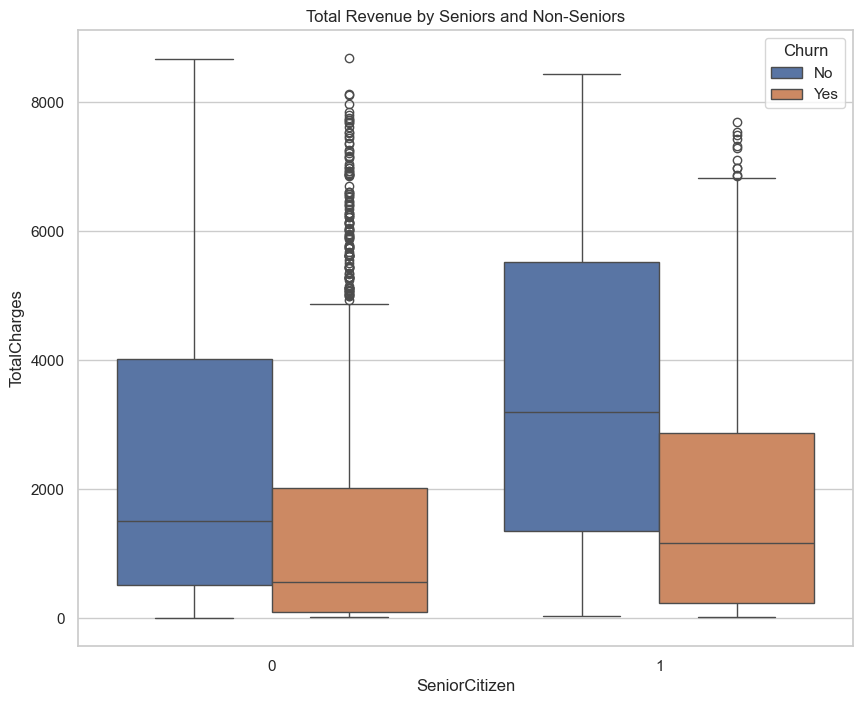

In [147]:
plt.figure(figsize = (10,8))

sns.set(style = 'whitegrid')
sns.boxplot(x = df.SeniorCitizen, y = df.TotalCharges, hue = df.Churn)

plt.title('Total Revenue by Seniors and Non-Seniors')

### Senior citizens contribute more to the company's revenue — they have a higher average monthly spend, generate more overall revenue, and tend to stay with the company longer. However, as observed, they also have a significantly higher churn rate compared to younger customers, which is clearly shown in the chart.

### These figures make sense. Older individuals tend to spend more time at home due to retirement or a slower-paced lifestyle, which leads them to consume more television content. As a result, they are more likely to subscribe to more comprehensive and expensive service packages.

<Axes: xlabel='gender', ylabel='count'>

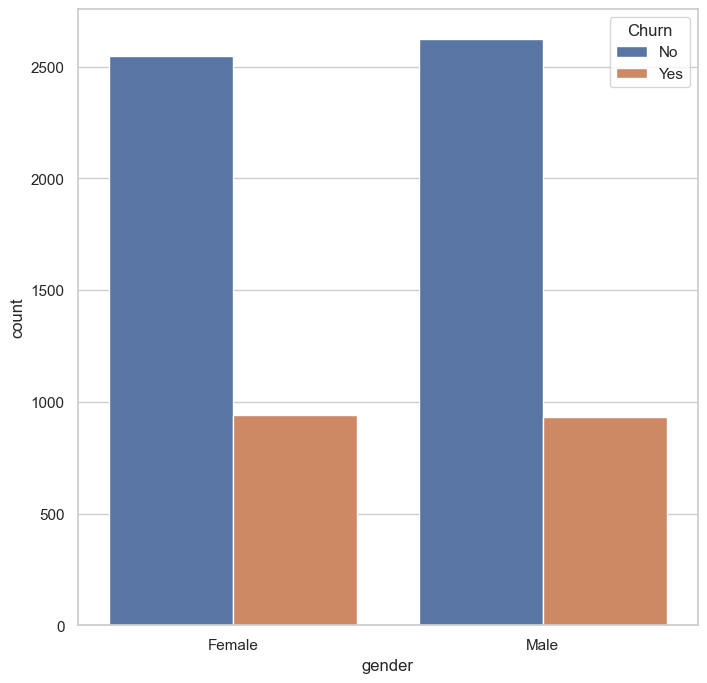

In [148]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(x = df.gender, hue = df.Churn)

In [149]:
receita_gender = df.groupby(by='gender')[['TotalCharges', 'MonthlyCharges']].mean().round()
receita_gender

TotalCharges  MonthlyCharges
gender                              
Female        2280.0            65.0
Male          2280.0            64.0

In [150]:
df.groupby(by = 'gender')['tenure'].mean().round()

gender
Female    32.0
Male      32.0
Name: tenure, dtype: float64

### There is no behavior difference between women and men.

<Axes: xlabel='Dependents', ylabel='count'>

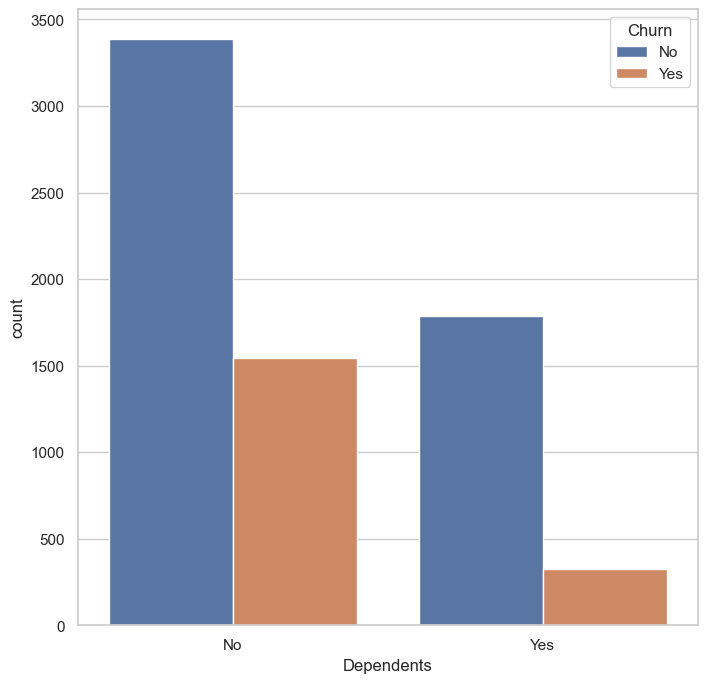

In [151]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(x = df.Dependents, hue = df.Churn)

<Axes: xlabel='Dependents'>

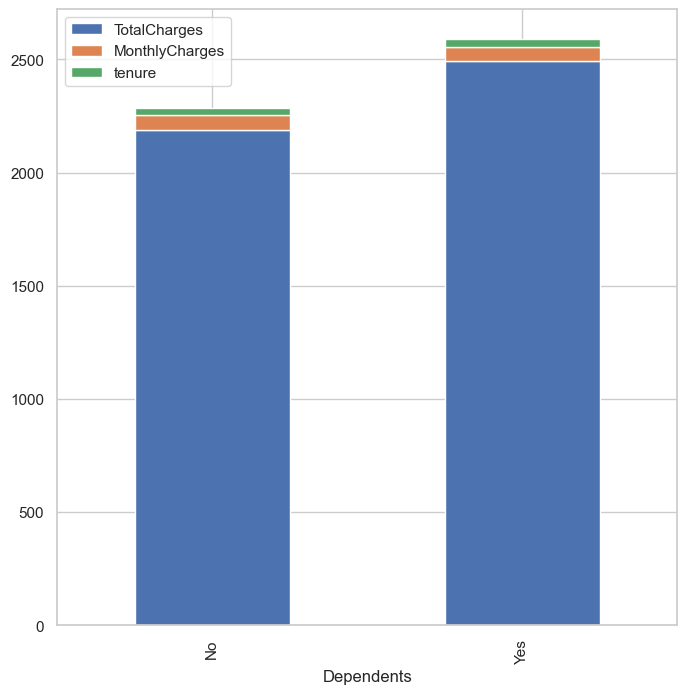

In [152]:
df.groupby('Dependents')[['TotalCharges', 'MonthlyCharges', 'tenure']].mean().plot(kind = 'bar', stacked = True, 
                                                                             figsize = (8,8))

<Axes: xlabel='Dependents'>

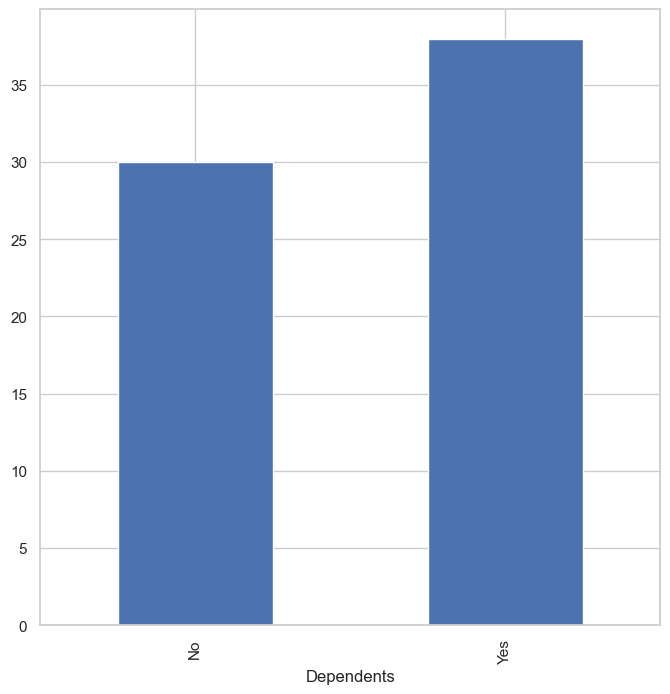

In [153]:
df.groupby('Dependents')['tenure'].mean().round().plot(kind = 'bar', stacked = True, figsize = (8,8))

In [154]:
ratio_dependents = df.groupby(by = 'Dependents')[['TotalCharges', 'MonthlyCharges','tenure']].mean().round()
ratio_dependents

TotalCharges  MonthlyCharges  tenure
Dependents                                      
No                2188.0            67.0    30.0
Yes               2495.0            60.0    38.0

### Although customers with dependents represent a smaller portion of the dataset, they tend to have a significantly longer tenure (on average 38 months compared to 30 months for those without dependents). Despite having lower monthly charges, they contribute more in total charges due to their longer commitment. This suggests that customers with dependents are more loyal and generate higher lifetime value, potentially making them a key target group for retention and upselling strategies.

In [155]:
df.InternetService.value_counts(normalize = True)

InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64

In [156]:
pd.crosstab(df['InternetService'], df['PhoneService'], margins=True).style.background_gradient(cmap='Blues')

### The data indicates that customers who do not subscribe to phone services are limited to using DSL internet, suggesting that Fiber Optic service is exclusively bundled with phone service. Conversely, those with phone service have access to both DSL and Fiber Optic options.

# Data Mining

In [157]:
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  
5           Electronic check          99.65        820.50    Yes  
6    Credit card (automatic)          89.10       1949.40     No  
7               Mailed check          29.75        301.90     No  
8           Electronic check         104.80       3046.05    Yes  
9  Bank transfer (automatic)          56.15       3487.95     No  

[10 rows x 21 columns]

In [158]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [159]:
df_mining = df
df_mining.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  
5           Electronic check          99.65        820.50    Yes  
6    Credit card (automatic)          89.10       1949.40     No  
7               Mailed check          29.75        301.90     No  
8           Electronic check         104.80       3046.05    Yes  
9  Bank transfer (automatic)          56.15       3487.95     No  

[10 rows x 21 columns]

In [160]:
df_mining.drop(['customerID','gender'], axis = 1, inplace = True)
df_mining.head(10)

SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines  \
0              0     Yes         No       1           No  No phone service   
1              0      No         No      34          Yes                No   
2              0      No         No       2          Yes                No   
3              0      No         No      45           No  No phone service   
4              0      No         No       2          Yes                No   
5              0      No         No       8          Yes               Yes   
6              0      No        Yes      22          Yes               Yes   
7              0      No         No      10           No  No phone service   
8              0     Yes         No      28          Yes               Yes   
9              0      No        Yes      62          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   
5     Fiber optic             No           No              Yes          No   
6     Fiber optic             No          Yes               No          No   
7             DSL            Yes           No               No          No   
8     Fiber optic             No           No              Yes         Yes   
9             DSL            Yes          Yes               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   
5         Yes             Yes  Month-to-month              Yes   
6         Yes              No  Month-to-month              Yes   
7          No              No  Month-to-month               No   
8         Yes             Yes  Month-to-month              Yes   
9          No              No        One year               No   

               PaymentMethod  MonthlyCharges  TotalCharges Churn  
0           Electronic check           29.85         29.85    No  
1               Mailed check           56.95       1889.50    No  
2               Mailed check           53.85        108.15   Yes  
3  Bank transfer (automatic)           42.30       1840.75    No  
4           Electronic check           70.70        151.65   Yes  
5           Electronic check           99.65        820.50   Yes  
6    Credit card (automatic)           89.10       1949.40    No  
7               Mailed check           29.75        301.90    No  
8           Electronic check          104.80       3046.05   Yes  
9  Bank transfer (automatic)           56.15       3487.95    No

### The customerID column was dropped due to its lack of analytical value as a unique identifier. The gender column was also removed since the male-to-female ratio is nearly equal, and it showed no significant correlation with churn or customer behavior.

In [161]:
df_mining.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [162]:
col_to_convert = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [163]:
for col in col_to_convert:
	df_mining[col] = df_mining[col].replace({'Yes':1, 'No':0})

C:\Users\thevi\AppData\Local\Temp\ipykernel_7180\2448840952.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mining[col] = df_mining[col].replace({'Yes':1, 'No':0})


In [164]:
df_mining.head(20)

SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0               0        1           0       1             0   
1               0        0           0      34             1   
2               0        0           0       2             1   
3               0        0           0      45             0   
4               0        0           0       2             1   
5               0        0           0       8             1   
6               0        0           1      22             1   
7               0        0           0      10             0   
8               0        1           0      28             1   
9               0        0           1      62             1   
10              0        1           1      13             1   
11              0        0           0      16             1   
12              0        1           0      58             1   
13              0        0           0      49             1   
14              0        0           0      25             1   
15              0        1           1      69             1   
16              0        0           0      52             1   
17              0        0           1      71             1   
18              0        1           1      10             1   
19              0        0           0      21             1   

       MultipleLines InternetService       OnlineSecurity  \
0   No phone service             DSL                    0   
1                 No             DSL                    1   
2                 No             DSL                    1   
3   No phone service             DSL                    1   
4                 No     Fiber optic                    0   
5                Yes     Fiber optic                    0   
6                Yes     Fiber optic                    0   
7   No phone service             DSL                    1   
8                Yes     Fiber optic                    0   
9                 No             DSL                    1   
10                No             DSL                    1   
11                No              No  No internet service   
12               Yes     Fiber optic                    0   
13               Yes     Fiber optic                    0   
14                No     Fiber optic                    1   
15               Yes     Fiber optic                    1   
16                No              No  No internet service   
17               Yes     Fiber optic                    1   
18                No             DSL                    0   
19                No     Fiber optic                    0   

           OnlineBackup     DeviceProtection          TechSupport  \
0                     1                    0                    0   
1                     0                    1                    0   
2                     1                    0                    0   
3                     0                    1                    1   
4                     0                    0                    0   
5                     0                    1                    0   
6                     1                    0                    0   
7                     0                    0                    0   
8                     0                    1                    1   
9                     1                    0                    0   
10                    0                    0                    0   
11  No internet service  No internet service  No internet service   
12                    0                    1                    0   
13                    1                    1                    0   
14                    0                    1                    1   
15                    1                    1                    1   
16  No internet service  No internet service  No internet service   
17                    0                    1                    0   
18                    0                    1                    1 

In [165]:
df_mining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [166]:
df_mining['MultipleLines'] = df_mining['MultipleLines'].replace({'No phone service':0})
df_mining['MultipleLines'] = df_mining['MultipleLines'].replace({'Yes':1, 'No':0})
df_mining['MultipleLines']

C:\Users\thevi\AppData\Local\Temp\ipykernel_7180\3078540840.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mining['MultipleLines'] = df_mining['MultipleLines'].replace({'Yes':1, 'No':0})


0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    0
7041    1
7042    0
Name: MultipleLines, Length: 7043, dtype: int64

In [167]:
df_miningTrue = pd.get_dummies(df_mining, columns = ['InternetService', 'Contract', 'PaymentMethod'], drop_first = True)
df_miningTrue.head(20)

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0               0        1           0       1             0              0   
1               0        0           0      34             1              0   
2               0        0           0       2             1              0   
3               0        0           0      45             0              0   
4               0        0           0       2             1              0   
5               0        0           0       8             1              1   
6               0        0           1      22             1              1   
7               0        0           0      10             0              0   
8               0        1           0      28             1              1   
9               0        0           1      62             1              0   
10              0        1           1      13             1              0   
11              0        0           0      16             1              0   
12              0        1           0      58             1              1   
13              0        0           0      49             1              1   
14              0        0           0      25             1              0   
15              0        1           1      69             1              1   
16              0        0           0      52             1              0   
17              0        0           1      71             1              1   
18              0        1           1      10             1              0   
19              0        0           0      21             1              0   

         OnlineSecurity         OnlineBackup     DeviceProtection  \
0                     0                    1                    0   
1                     1                    0                    1   
2                     1                    1                    0   
3                     1                    0                    1   
4                     0                    0                    0   
5                     0                    0                    1   
6                     0                    1                    0   
7                     1                    0                    0   
8                     0                    0                    1   
9                     1                    1                    0   
10                    1                    0                    0   
11  No internet service  No internet service  No internet service   
12                    0                    0                    1   
13                    0                    1                    1   
14                    1                    0                    1   
15                    1                    1                    1   
16  No internet service  No internet service  No internet service   
17                    1                    0                    1   
18                    0                    0                    1   
19                    0                    1                    1   

            TechSupport  ... MonthlyCharges TotalCharges  Churn  \
0                     0  ...          29.85        29.85      0   
1                     0  ...          56.95      1889.50      0   
2                     0  ...          53.85       108.15      1   
3                     1  ...          42.30      1840.75      0   
4                     0  ...          70.70       151.65      1   
5                     0  ...          99.65       820.50      1   
6                     0  ...          89.10      1949.40      0   
7                     0  ...          29.75       301.90      0   
8                     1  ...         104.80      3046.05      1   
9                     0  ...          56.15      3487.95      0   
10                    0  ...          49.95       587.45      0   
11  No internet service  ...          18.95       326.80      0   
12                    0

In [168]:
df_miningTrue.OnlineSecurity = df_miningTrue.OnlineSecurity.replace(to_replace= 'No internet service', value = 0)
df_miningTrue.OnlineBackup = df_miningTrue.OnlineBackup.replace(to_replace= 'No internet service', value = 0)
df_miningTrue.DeviceProtection = df_miningTrue.DeviceProtection.replace(to_replace= 'No internet service', value = 0)
df_miningTrue.TechSupport = df_miningTrue.TechSupport.replace(to_replace= 'No internet service', value = 0)
df_miningTrue.StreamingTV = df_miningTrue.StreamingTV.replace(to_replace= 'No internet service', value = 0)
df_miningTrue.StreamingMovies = df_miningTrue.StreamingMovies.replace(to_replace= 'No internet service', value = 0)
df_miningTrue.head(10)

C:\Users\thevi\AppData\Local\Temp\ipykernel_7180\4120984066.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_miningTrue.OnlineSecurity = df_miningTrue.OnlineSecurity.replace(to_replace= 'No internet service', value = 0)
C:\Users\thevi\AppData\Local\Temp\ipykernel_7180\4120984066.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_miningTrue.OnlineBackup = df_miningTrue.OnlineBackup.replace(to_replace= 'No internet service', value = 0)
C:\Users\thevi\AppData\Local\Temp\ipykernel_7180\4120984066.py:3: FutureWarning: Downcas

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0              0        1           0       1             0              0   
1              0        0           0      34             1              0   
2              0        0           0       2             1              0   
3              0        0           0      45             0              0   
4              0        0           0       2             1              0   
5              0        0           0       8             1              1   
6              0        0           1      22             1              1   
7              0        0           0      10             0              0   
8              0        1           0      28             1              1   
9              0        0           1      62             1              0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
0               0             1                 0            0  ...   
1               1             0                 1            0  ...   
2               1             1                 0            0  ...   
3               1             0                 1            1  ...   
4               0             0                 0            0  ...   
5               0             0                 1            0  ...   
6               0             1                 0            0  ...   
7               1             0                 0            0  ...   
8               0             0                 1            1  ...   
9               1             1                 0            0  ...   

   MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0           29.85         29.85      0                        False   
1           56.95       1889.50      0                        False   
2           53.85        108.15      1                        False   
3           42.30       1840.75      0                        False   
4           70.70        151.65      1                         True   
5           99.65        820.50      1                         True   
6           89.10       1949.40      0                         True   
7           29.75        301.90      0                        False   
8          104.80       3046.05      1                         True   
9           56.15       3487.95      0                        False   

   InternetService_No  Contract_One year  Contract_Two year  \
0               False              False              False   
1               False               True              False   
2               False              False              False   
3               False               True              False   
4               False              False              False   
5               False              False              False   
6               False              False              False   
7               False              False              False   
8               False              False              False   
9               False               True              False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   
5                                  False                            True   
6                                   True                           False   
7                                  False                           False   
8                                  False                            True   
9                                  False                           False   

   PaymentMethod_Mailed check  
0                

### Decision Tree

In [169]:
from sklearn.model_selection import train_test_split

X = df_miningTrue.drop('Churn',axis=1)
y = df_miningTrue['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
dtc = tree.DecisionTreeClassifier (random_state = 42)
parameters = [{'criterion':['gini','entropy'], 'max_depth': [5,10,15,30]}]
grid_dtc = GridSearchCV(dtc, parameters, verbose=5, n_jobs=-1)
grid_dtc.fit(X_train, y_train)
print("Best")
print(grid_dtc.best_params_)
print("Train score:", grid_dtc.score(X_train, y_train))
print("Validation score:", grid_dtc.score(X_test,y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best
{'criterion': 'entropy', 'max_depth': 5}
Train score: 0.7905573304934327
Validation score: 0.7913413768630234


In [171]:
print("\nDefault DecisionTreeClassifier:")
dtc.fit(X_train, y_train)
print("Train Score (Default):", dtc.score(X_train, y_train))
print("Validation Score (Default):", dtc.score(X_test, y_test))


Default DecisionTreeClassifier:
Train Score (Default): 0.9980475683351083
Validation Score (Default): 0.7104329311568488


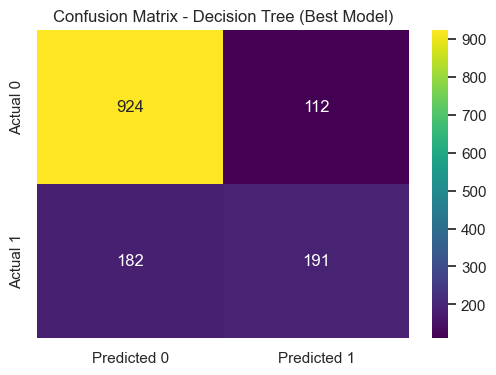

In [172]:
from sklearn.metrics import confusion_matrix, accuracy_score
best_model_dtc = grid_dtc.best_estimator_
y_pred = best_model_dtc.predict(X_test)

# Confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix = pd.DataFrame(
    data=confmat,
    columns=['Predicted 0', 'Predicted 1'],
    index=['Actual 0', 'Actual 1']
)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Decision Tree (Best Model)")
plt.show()

<Axes: >

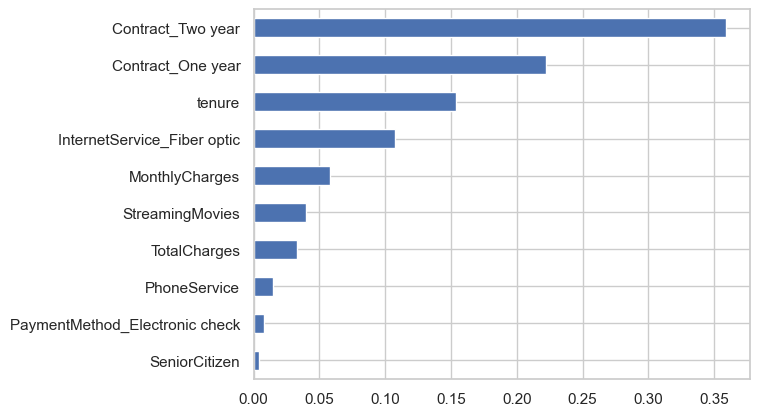

In [173]:
importances = best_model_dtc.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

[Text(0.5816326530612245, 0.9166666666666666, 'Contract_Two year <= 0.5\nentropy = 0.835\nsamples = 5634\nvalue = [4138, 1496]\nclass = y[0]'),
 Text(0.32653061224489793, 0.75, 'Contract_One year <= 0.5\nentropy = 0.924\nsamples = 4295\nvalue = [2837, 1458]\nclass = y[0]'),
 Text(0.45408163265306123, 0.8333333333333333, 'True  '),
 Text(0.16326530612244897, 0.5833333333333334, 'InternetService_Fiber optic <= 0.5\nentropy = 0.984\nsamples = 3083\nvalue = [1768.0, 1315.0]\nclass = y[0]'),
 Text(0.08163265306122448, 0.4166666666666667, 'tenure <= 5.5\nentropy = 0.866\nsamples = 1386\nvalue = [987.0, 399.0]\nclass = y[0]'),
 Text(0.04081632653061224, 0.25, 'MonthlyCharges <= 20.875\nentropy = 0.984\nsamples = 586\nvalue = [337, 249]\nclass = y[0]'),
 Text(0.02040816326530612, 0.08333333333333333, 'entropy = 0.829\nsamples = 195\nvalue = [144, 51]\nclass = y[0]'),
 Text(0.061224489795918366, 0.08333333333333333, 'entropy = 1.0\nsamples = 391\nvalue = [193.0, 198.0]\nclass = y[1]'),
 Text(0.

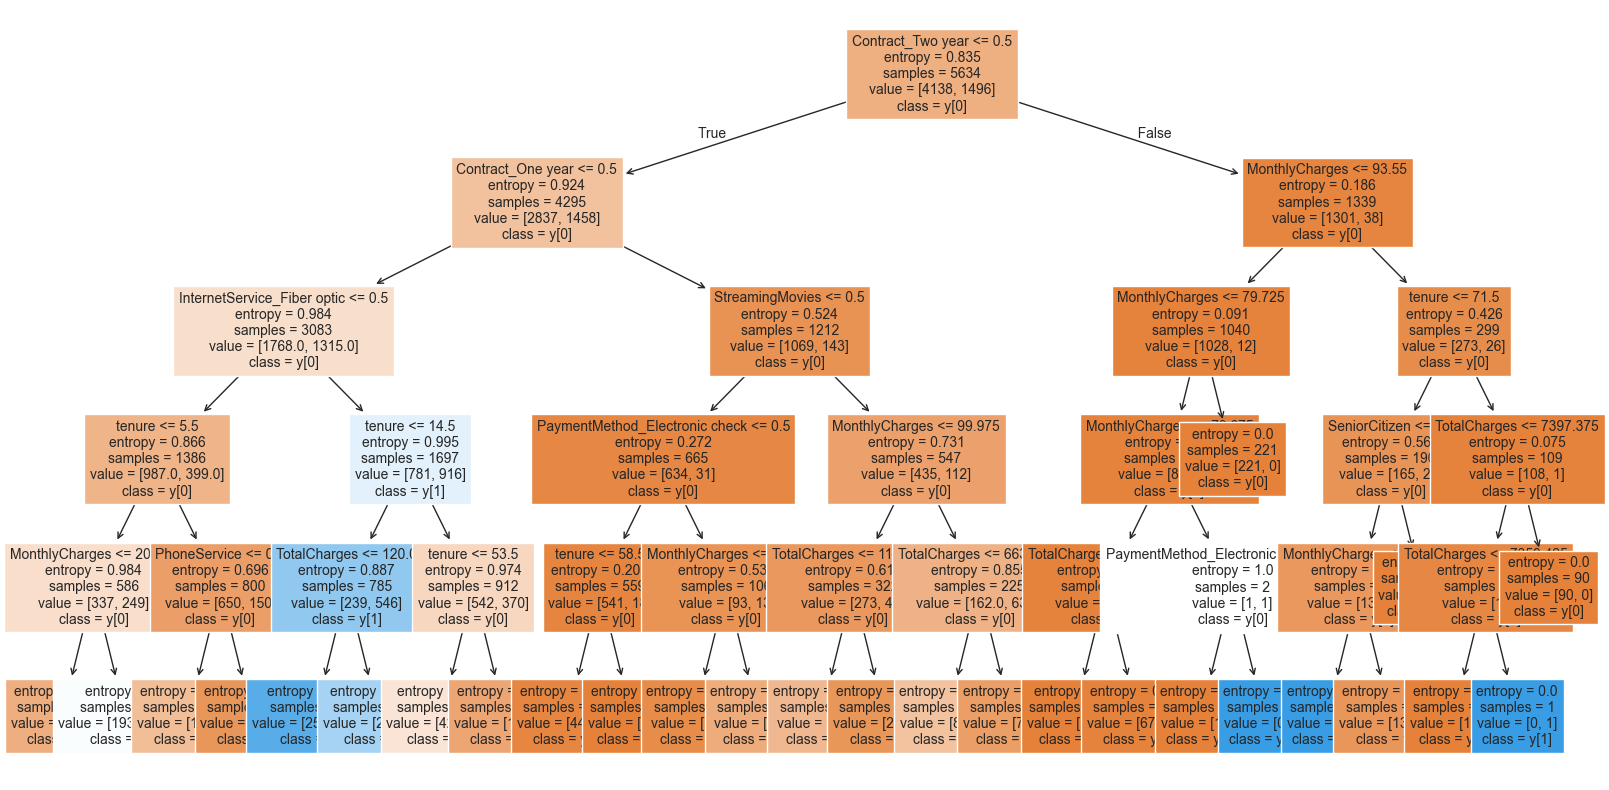

In [174]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(
    best_model_dtc,
    max_depth=5,
    fontsize=10,
    feature_names=X_train.columns.to_list(),
    class_names=True,
    filled=True
)

In [175]:
accuracy = {}
accuracy["Decision Tree"] = accuracy_score(y_test, y_pred)
print("Validation Accuracy (Best Model):", accuracy["Decision Tree"])

Validation Accuracy (Best Model): 0.7913413768630234


### Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs = -1, random_state = 42)
parameters = [{"n_estimators" :[50,100,200,500], "max_depth" : [5,10,15,30]}]
grid_rfc = GridSearchCV(rfc, parameters, verbose = 5, n_jobs = -1)
grid_rfc.fit(X_train, y_train)
print("Best")
print(grid_rfc.best_params_)
print("Train score:", grid_rfc.score(X_train, y_train))
print("Validation score:", grid_rfc.score(X_test,y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best
{'max_depth': 10, 'n_estimators': 200}
Train score: 0.8693645722399717
Validation score: 0.8097941802696949


In [177]:
print("\nDefault DecisionTreeClassifier:")
rfc.fit(X_train, y_train)
print("Train Score (Default):", rfc.score(X_train, y_train))
print("Validation Score (Default):", rfc.score(X_test, y_test))


Default DecisionTreeClassifier:
Train Score (Default): 0.9978700745473909
Validation Score (Default): 0.794889992902768


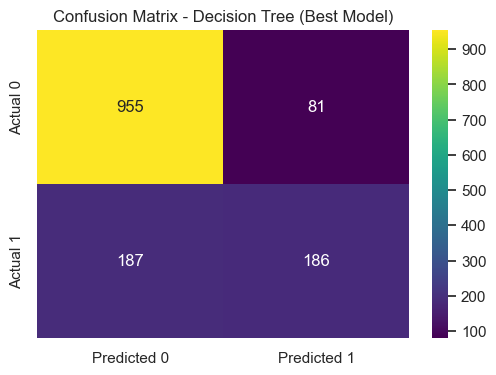

In [178]:
from sklearn.metrics import confusion_matrix, accuracy_score
best_model_rfc = grid_rfc.best_estimator_
y_pred = best_model_rfc.predict(X_test)

# Confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix = pd.DataFrame(
    data=confmat,
    columns=['Predicted 0', 'Predicted 1'],
    index=['Actual 0', 'Actual 1']
)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Decision Tree (Best Model)")
plt.show()

<Axes: >

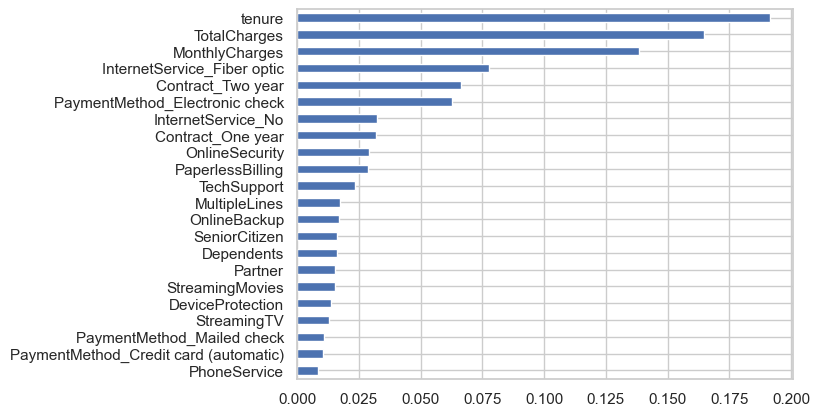

In [179]:
importances = best_model_rfc.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-30:].plot(kind = 'barh')

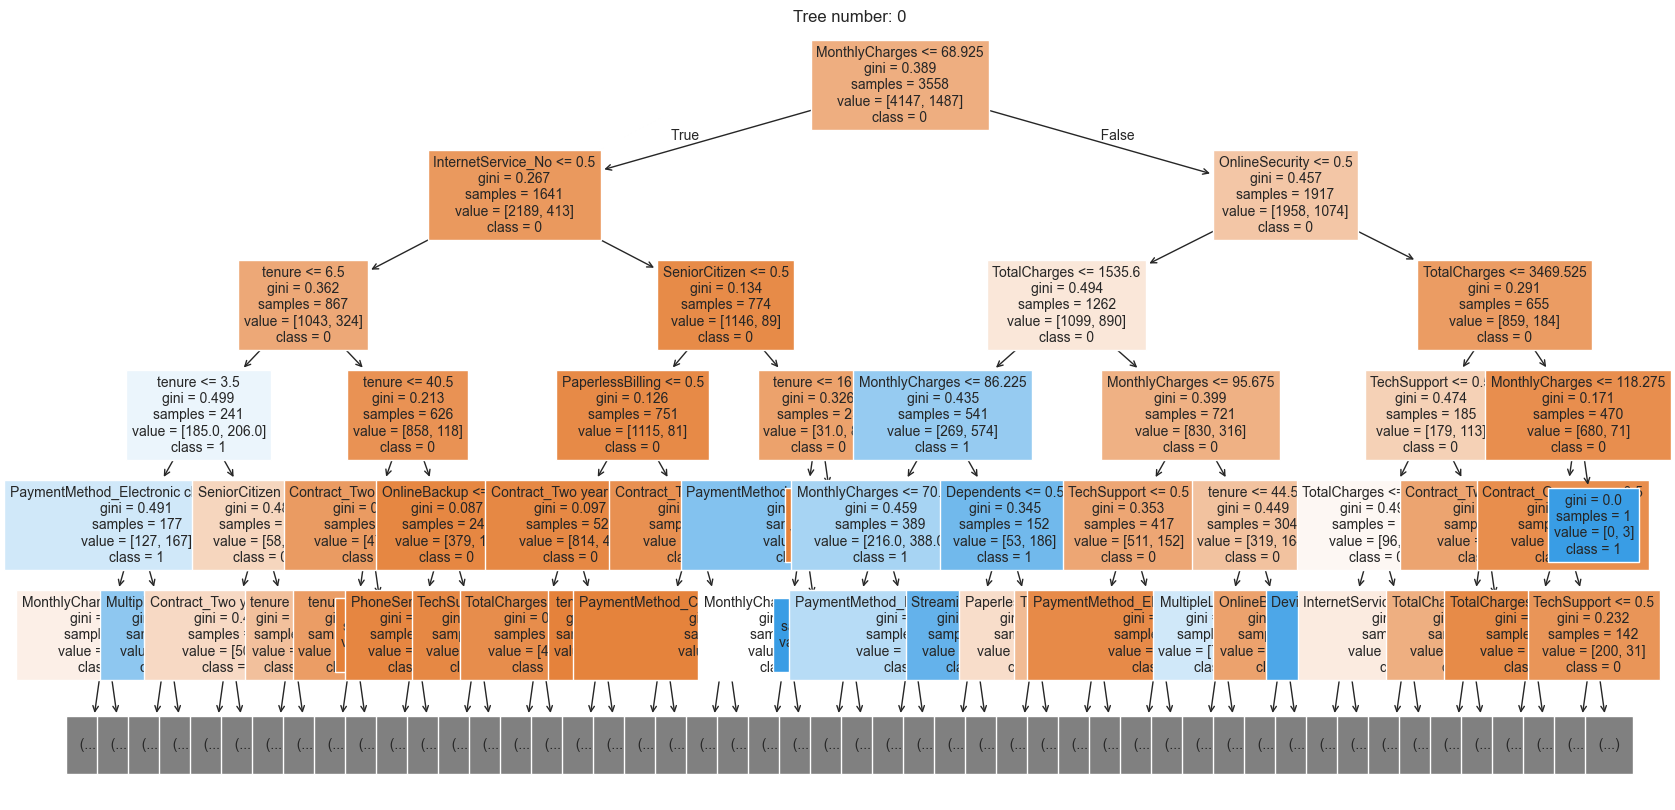

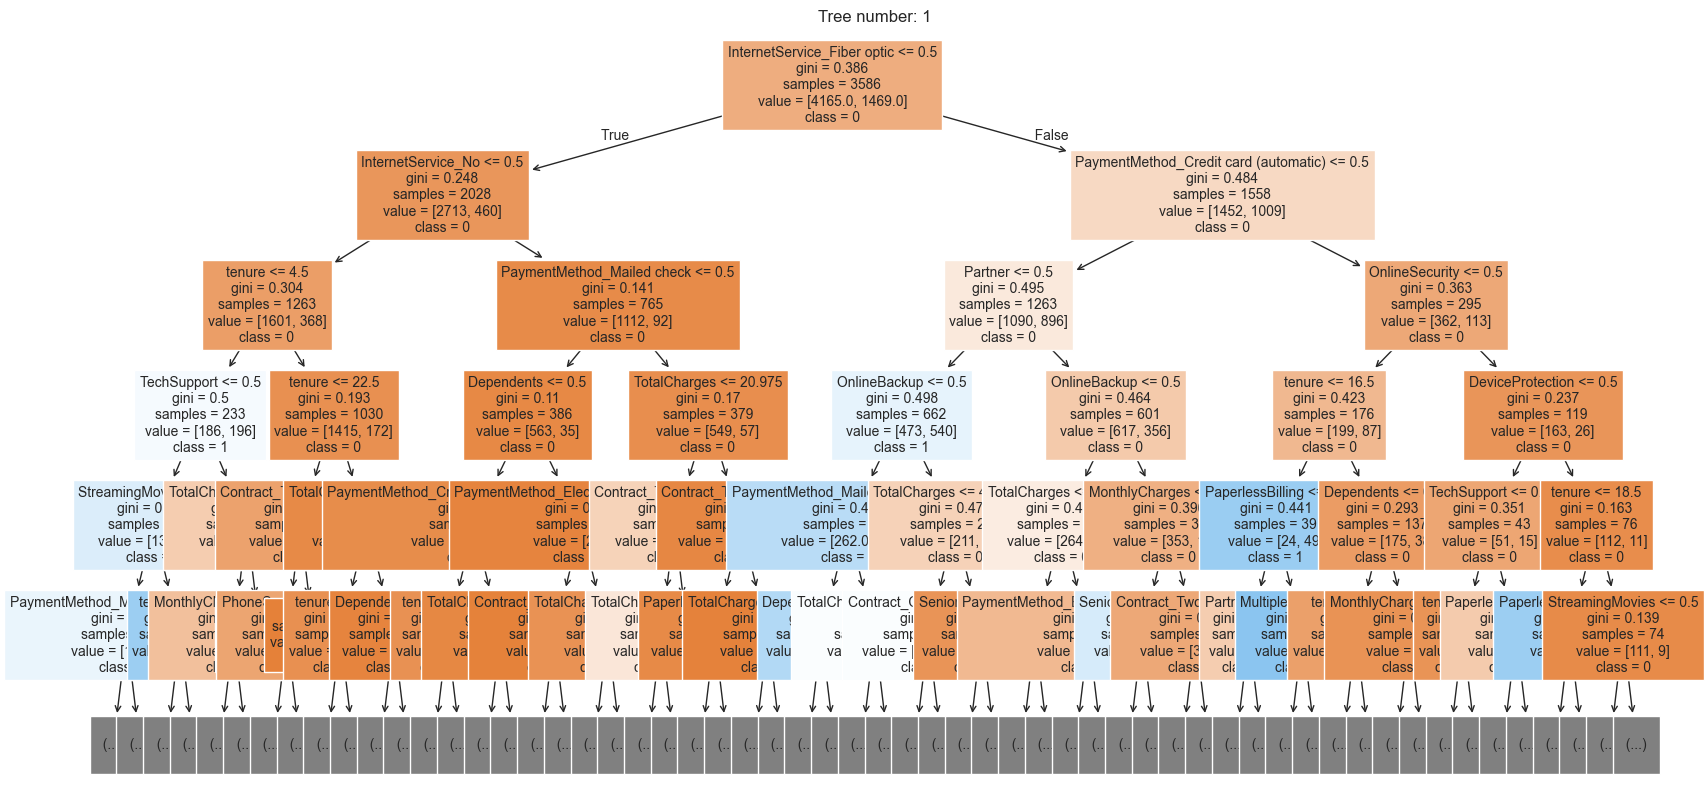

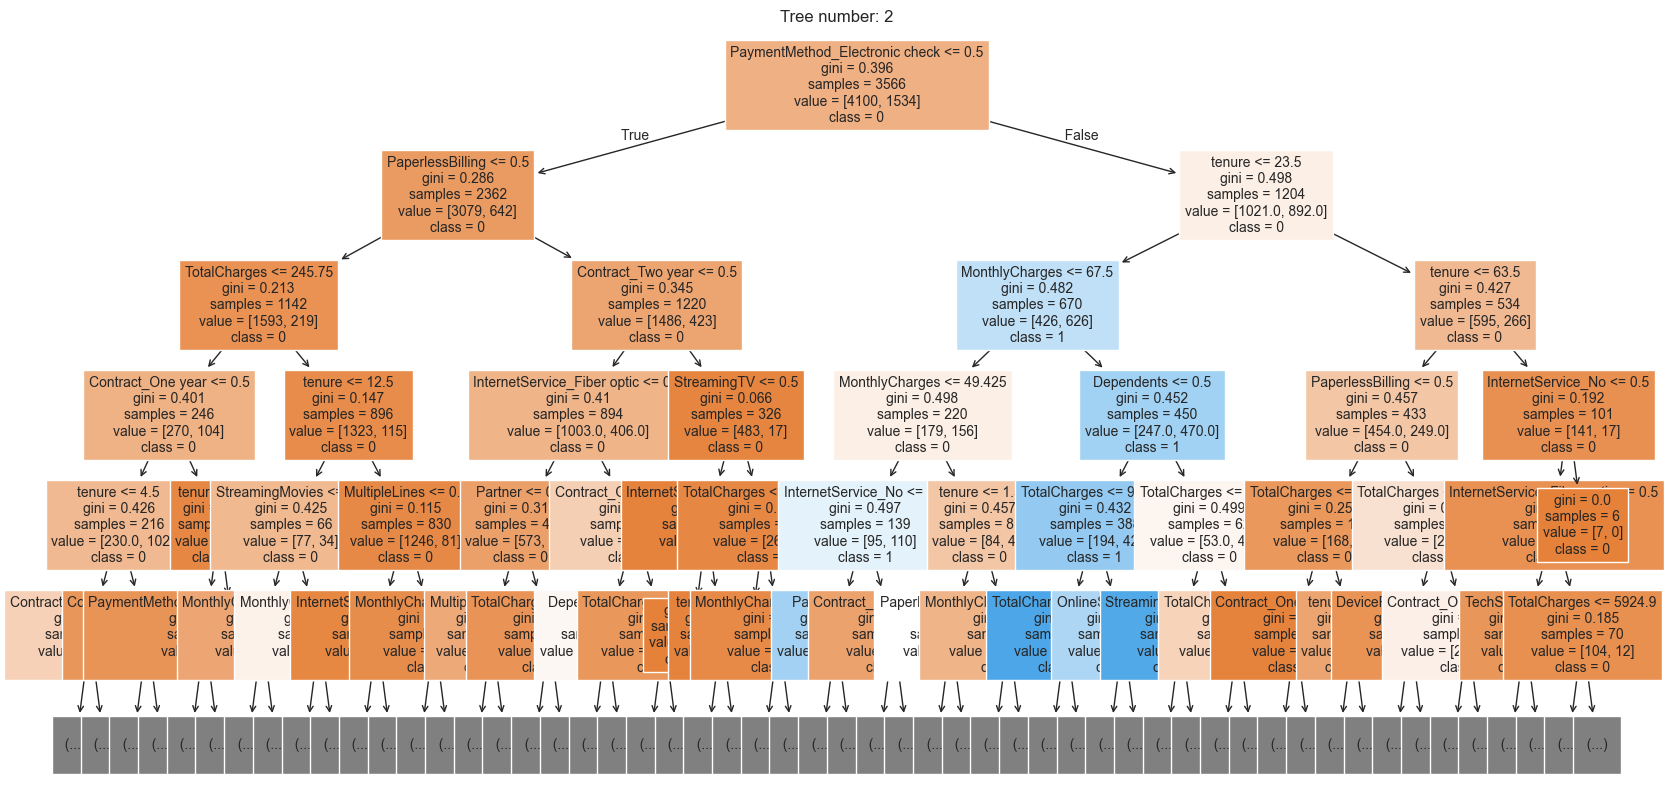

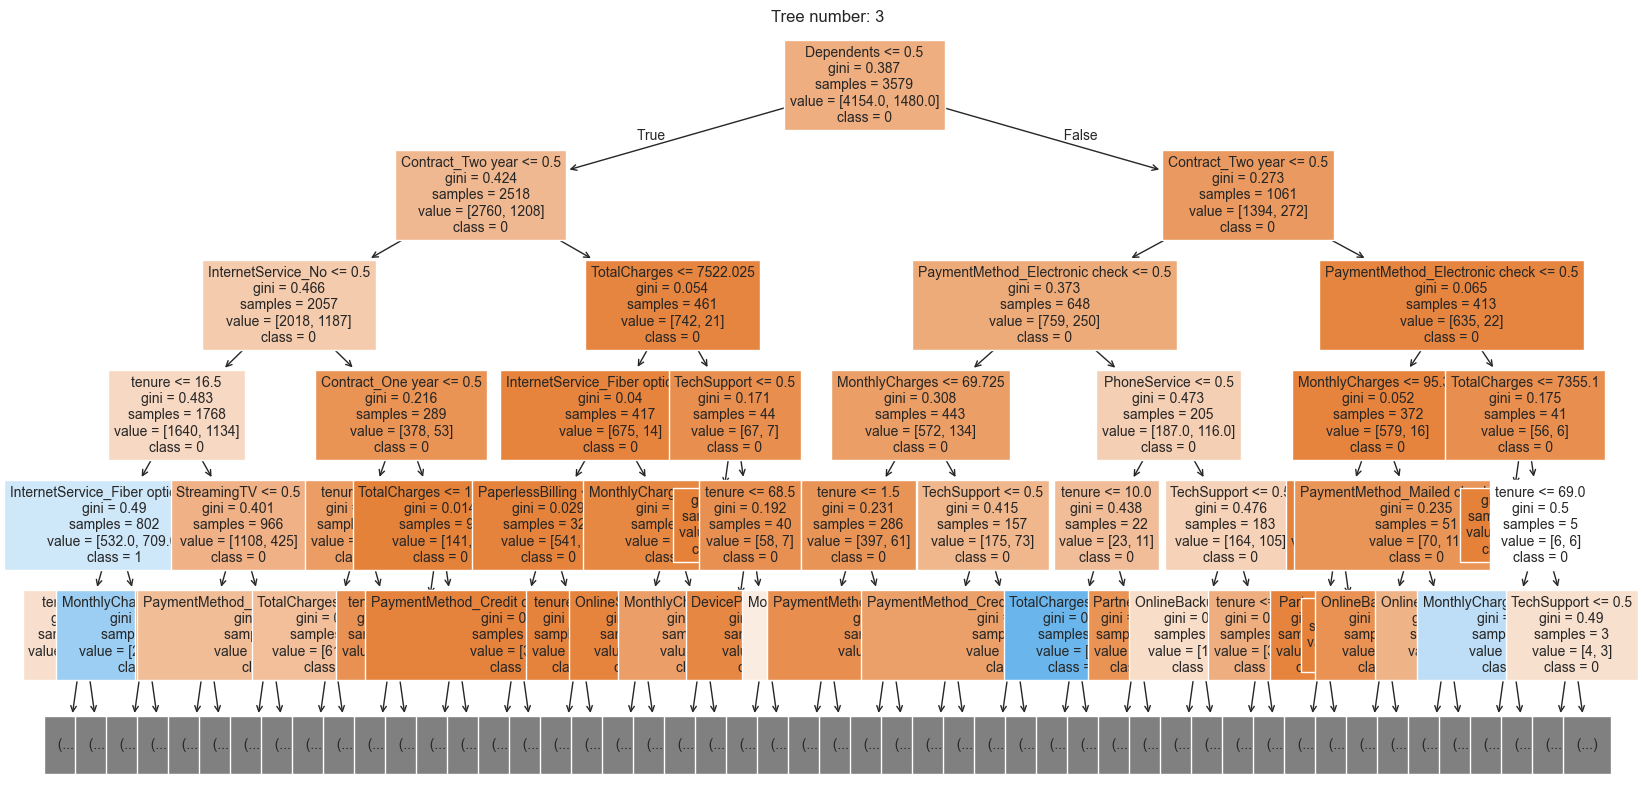

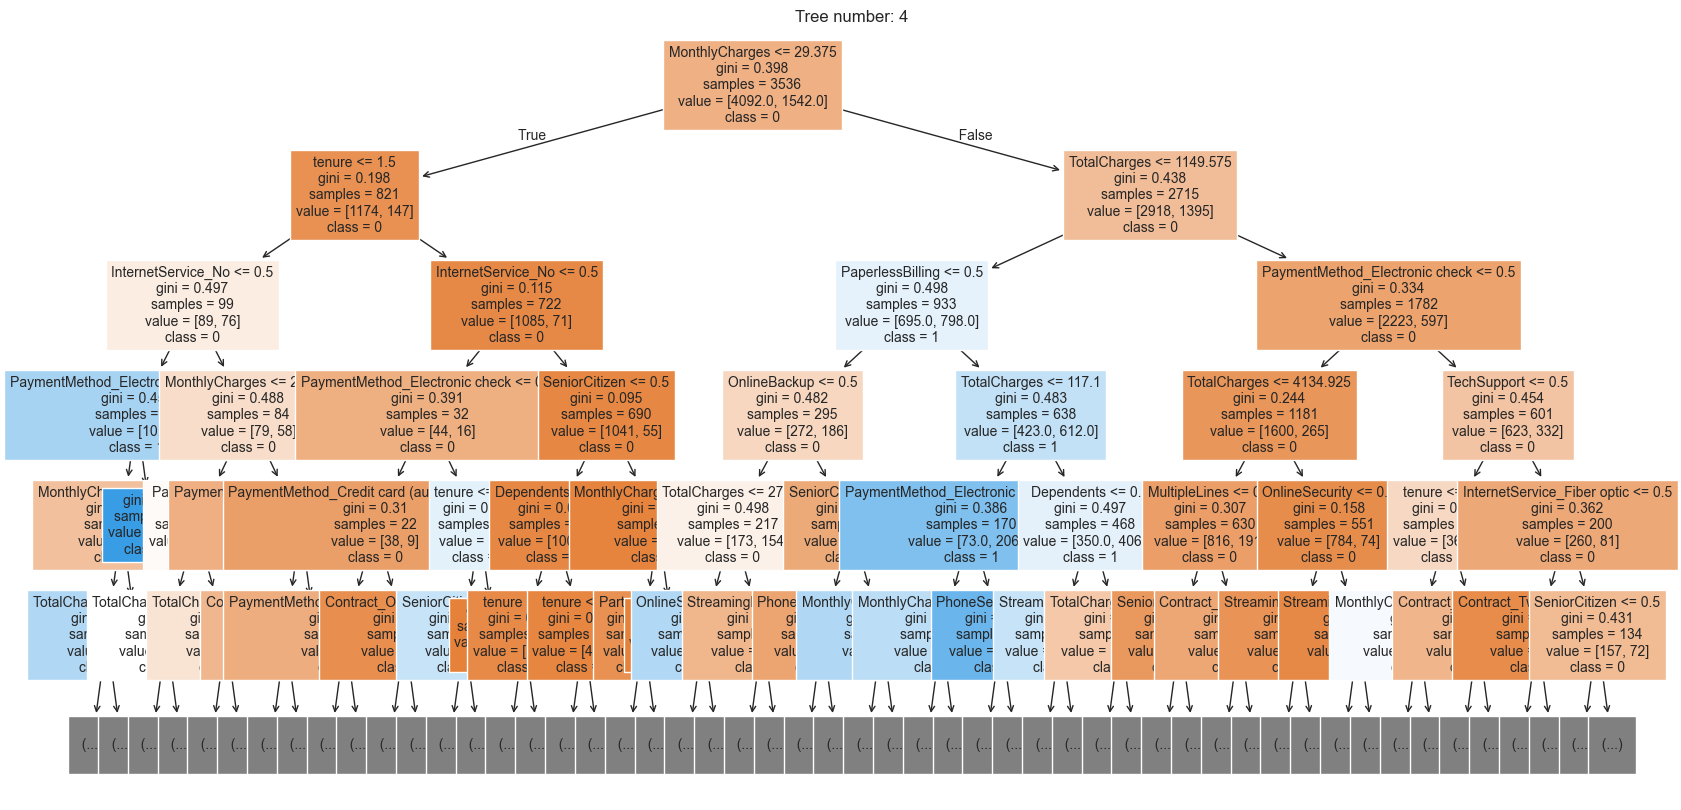

In [180]:
for i in range(5):
    estimator = best_model_rfc.estimators_[i]
    fig, ax = plt.subplots(figsize=(20, 10))
    plot_tree(
        estimator,
        max_depth=5, 
        fontsize=10,
        feature_names=X_train.columns.to_list(),
        class_names=best_model_rfc.classes_.astype(str),
        filled=True
    )
    plt.title(f"Tree number: {i}")
    plt.show()

In [181]:
accuracy["Random Forest"] = accuracy_score(y_test, y_pred)
print("Validation Accuracy (Best Model):", accuracy["Random Forest"])

Validation Accuracy (Best Model): 0.8097941802696949
